# Analyse Exploratoire

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import des modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Analyse Exploratoire

In [3]:
building_consumption = pd.read_csv('/content/drive/MyDrive/Projet_EmissionCo2/2016_Building_Energy_Benchmarking.csv')

In [20]:
# On regarde comment un batiment est défini dans ce jeu de données

building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [ ]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type
building_consumption.info(True)

In [8]:
building_consumption_bis=building_consumption.drop(columns=['DataYear','OSEBuildingID','Address','ZipCode','PropertyName','TaxParcelIdentificationNumber','Neighborhood','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Comments','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','Latitude','Longitude','CouncilDistrictCode','ComplianceStatus','City','State','SiteEUIWN(kBtu/sf)'
,'SourceEUI(kBtu/sf)'
,'SourceEUIWN(kBtu/sf)'
,'SiteEnergyUse(kBtu)'
,'SiteEnergyUseWN(kBtu)'
,'SteamUse(kBtu)'
,'Electricity(kWh)'
,'Electricity(kBtu)'
,'NaturalGas(therms)'
,'NaturalGas(kBtu)'
,'SiteEUI(kBtu/sf)'                            ])
building_consumption_bis.info(True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingType               3376 non-null   object 
 1   PrimaryPropertyType        3376 non-null   object 
 2   YearBuilt                  3376 non-null   int64  
 3   NumberofBuildings          3368 non-null   float64
 4   NumberofFloors             3376 non-null   int64  
 5   PropertyGFATotal           3376 non-null   int64  
 6   PropertyGFAParking         3376 non-null   int64  
 7   PropertyGFABuilding(s)     3376 non-null   int64  
 8   ListOfAllPropertyUseTypes  3367 non-null   object 
 9   LargestPropertyUseType     3356 non-null   object 
 10  LargestPropertyUseTypeGFA  3356 non-null   float64
 11  ENERGYSTARScore            2533 non-null   float64
 12  DefaultData                3376 non-null   bool   
 13  Outlier                    32 non-null     objec

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
building_consumption_bis[building_consumption_bis['TotalGHGEmissions']<0].head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3206,NonResidential,Small- and Mid-Sized Office,2013,1.0,6,52000,0,52000,Office,Office,48159.0,100.0,False,NaN,-0.8,-0.02


In [29]:
from scipy import stats
df=building_consumption_bis
df = df[(df["TotalGHGEmissions"] > 0) & (~df["TotalGHGEmissions"].isna())]

# Exemple : transformer une colonne strictement positive
y = df["TotalGHGEmissions"].values
y_transformed, fitted_lambda = stats.boxcox(y)

print("Lambda optimal :", fitted_lambda)

Lambda optimal : -0.047649855957421584


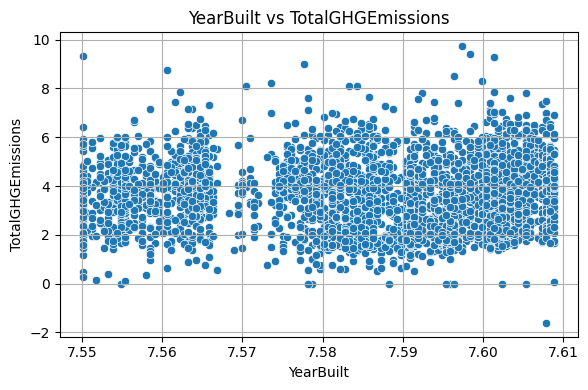

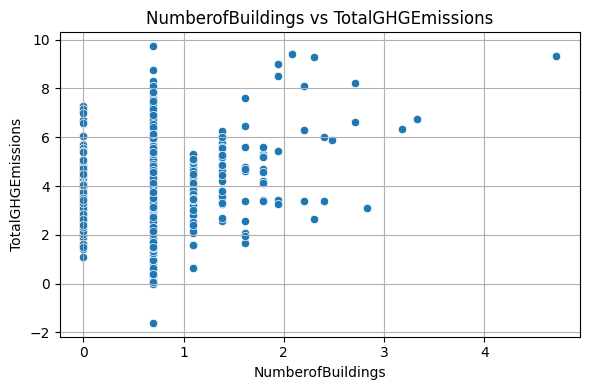

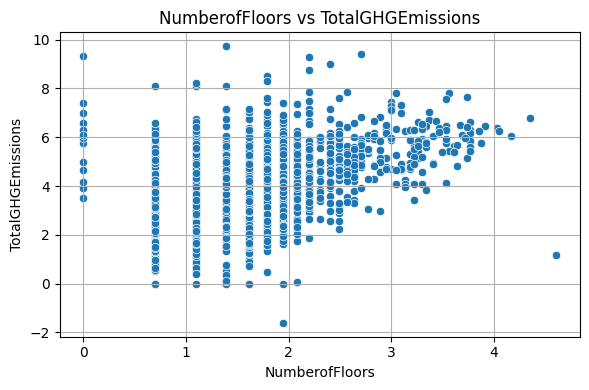

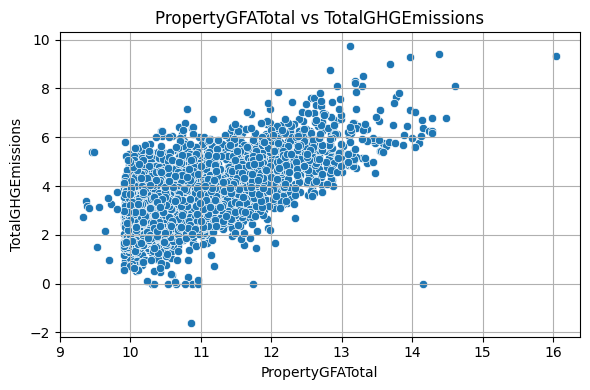

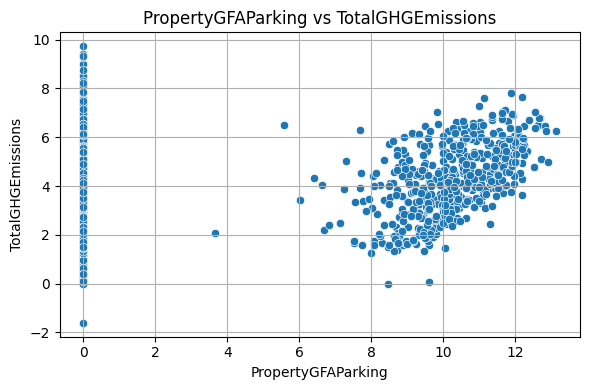

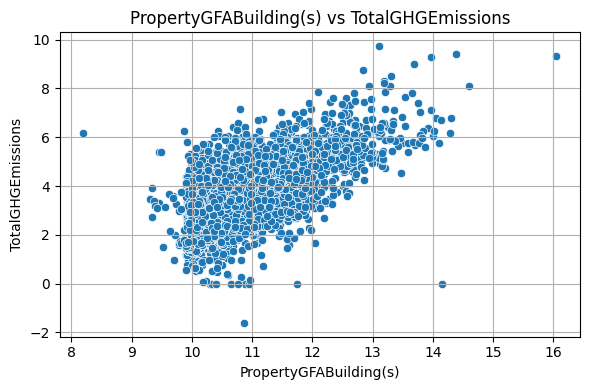

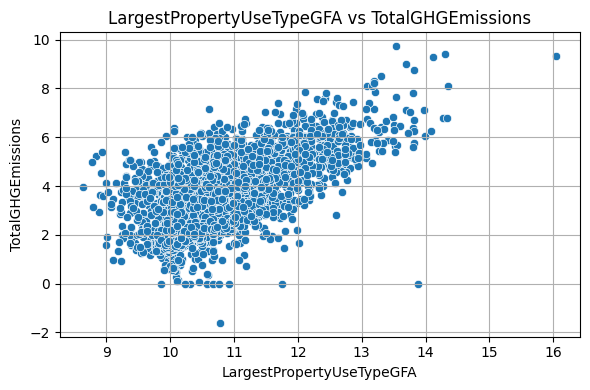

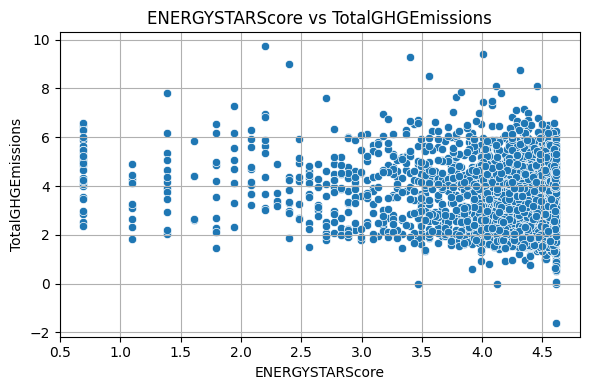

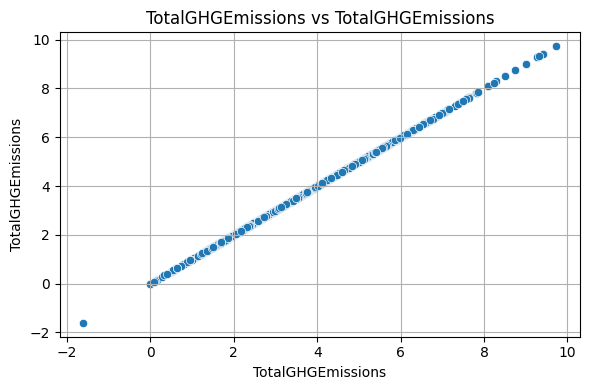

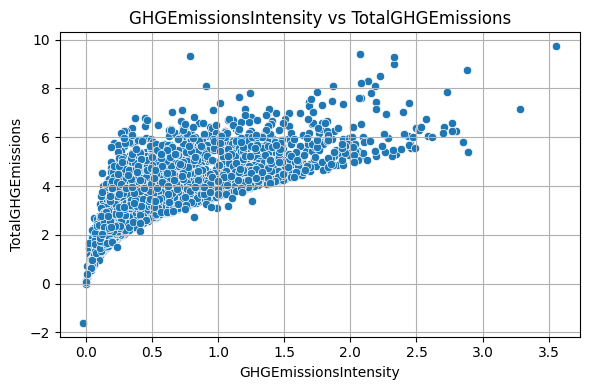

In [36]:
import numpy as np

# Créer une copie
df = building_consumption_bis.copy()

# Sélectionner les colonnes numériques
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns

# Filtrer les lignes où toutes les colonnes numériques sont > 0
df_positive = df[(df[numerical_cols] > 0).all(axis=1)]


# Colonnes numériques éligibles
log_candidates = [
    col for col in df_positive.select_dtypes(include=["int64", "float64"]).columns ]

# Appliquer log1p pour chaque colonne (log(x + 1))
for col in log_candidates:
    df[col] = np.log1p(df[col])

# === Filtrer les colonnes numériques (sauf la cible)
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != target]

# === Tracer le nuage de points pour chaque colonne vs la cible
for col in numerical_cols:
    if df[col].std() == 0:
        continue  # ignorer colonnes constantes
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[col], y=df['TotalGHGEmissions'])
    plt.title(f"{col} vs {'TotalGHGEmissions'}")
    plt.xlabel(col)
    plt.ylabel('TotalGHGEmissions')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [16]:
building_consumption_bis.head()

,BuildingType,PrimaryPropertyType,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,ENERGYSTARScore,DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,NonResidential,Hotel,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,60.0,False,NaN,249.98,2.83
1,NonResidential,Hotel,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,61.0,False,NaN,295.86,2.86
2,NonResidential,Hotel,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,43.0,False,NaN,2089.28,2.19
3,NonResidential,Hotel,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,56.0,False,NaN,286.43,4.67
4,NonResidential,Hotel,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,75.0,False,NaN,505.01,2.88


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Spécifie ta variable cible ===
target = "TotalGHGEmissions"


# Créer une copie du DataFrame pour ne pas écraser l'original
df_log = building_consumption_bis.copy()

# Colonnes numériques éligibles : valeurs strictement > 0
log_candidates = [
    col for col in df_log.select_dtypes(include=["int64", "float64"]).columns
    if (df_log[col] > 0).all()
]

# Appliquer la transformation log (base e) sur chaque colonne éligible
for col in log_candidates:
    df_log[f"{col}_log"] = np.log(df_log[col])




# === On suppose que df est déjà filtré (par exemple : df = df[df[target] <= 2000])
# Et qu’il ne contient pas de NaN dans les colonnes utilisées

# === Filtrer les colonnes numériques (sauf la cible)
numerical_cols = df_log.select_dtypes(include=["int64", "float64"]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col != target]

# === Tracer le nuage de points pour chaque colonne vs la cible
for col in numerical_cols:
    if df_log[col].std() == 0:
        continue  # ignorer colonnes constantes
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df_log[col], y=df_log[target])
    plt.title(f"{col} vs {target}")
    plt.xlabel(col)
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


KeyError: 'TotalGHGEmissions_log'

<Figure size 600x400 with 0 Axes>

In [ ]:
print(building_consumption_bis.nunique())

DataYear                        1
BuildingType                    8
PrimaryPropertyType            24
YearBuilt                     113
NumberofBuildings              17
NumberofFloors                 50
PropertyGFATotal             3195
PropertyGFAParking            496
PropertyGFABuilding(s)       3193
ListOfAllPropertyUseTypes     466
LargestPropertyUseType         56
LargestPropertyUseTypeGFA    3122
ENERGYSTARScore               100
SiteEUI(kBtu/sf)             1085
SiteEUIWN(kBtu/sf)           1105
SourceEUI(kBtu/sf)           1648
SourceEUIWN(kBtu/sf)         1694
SiteEnergyUse(kBtu)          3354
SiteEnergyUseWN(kBtu)        3341
SteamUse(kBtu)                131
Electricity(kBtu)            3351
NaturalGas(kBtu)             2109
DefaultData                     2
Outlier                         2
TotalGHGEmissions            2818
GHGEmissionsIntensity         511
dtype: int64


In [ ]:
building_consumption_bis=building_consumption_bis[building_consumption_bis["Outlier"]!="True"]

In [ ]:
building_consumption_ter=building_consumption_bis[building_consumption_bis["TotalGHGEmissions"]>5000]

In [ ]:
building_consumption_ter

NameError: name 'building_consumption_ter' is not defined

In [ ]:
import seaborn as sns

sns.scatterplot(data=building_consumption_ter, x='PropertyGFATotal', y='TotalGHGEmissions')
plt.title("TotalGHGEmissions par Année de Constructions")
plt.show()

NameError: name 'building_consumption_ter' is not defined

In [ ]:

building_consumption_bis.groupby(["YearBuilt"

,"NumberofFloors"])["TotalGHGEmissions"].mean()

YearBuilt  NumberofFloors
1900       0                 11140.560000
           1                   163.627500
           2                    64.080000
           3                    53.582500
           4                    40.527778
                                 ...     
2015       10                  214.190000
           12                  202.120000
           14                   50.320000
           20                  103.370000
           40                  395.260000
Name: TotalGHGEmissions, Length: 897, dtype: float64

#### TERMINER L'ANALYSE EXPLORATOIRE

A réaliser :
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse :

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet.

# Modélisation

### Import des modules

In [ ]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes.

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [ ]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [ ]:
# CODE PREPARATION DES FEATURES

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [ ]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [ ]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE